## Predicting if a person will have diabetes or not

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('../../../Data Science/DataSets/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
#columns that can't be zero
zero_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_column:
    data[col] = data[col].replace(0, np.nan)
    mean = data[col].mean(skipna=True)
    data[col] = data[col].replace(np.nan, mean)

In [4]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [6]:
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

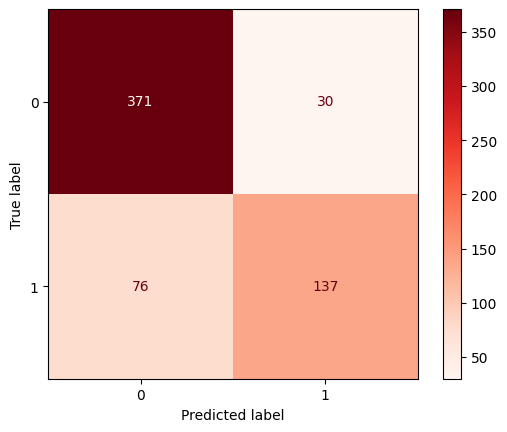

In [15]:
cm_train = confusion_matrix(y_train, y_train_pred)
dig = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
dig.plot(cmap=plt.cm.Reds)

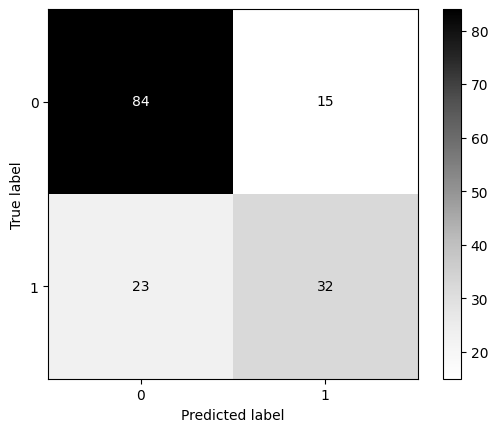

In [16]:
cm_test = confusion_matrix(y_test, y_test_pred)
dig = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
dig.plot(cmap=plt.cm.Greys)

In [12]:
print("Training Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Training F1_score: {}".format(f1_score(y_train, y_train_pred)))
print("Testing Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Testing F1_score: {}".format(f1_score(y_test, y_test_pred)))

Training Accuracy: 0.8273615635179153
Training F1_score: 0.7210526315789474
Testing Accuracy: 0.7532467532467533
Testing F1_score: 0.6274509803921569
